In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Function of the perceptron algorithm
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1
        
    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return 

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break

    # Predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

Classification problem: Breast cancer data

Breast cancer data from python package was chosen for the perceptron modeling. For simplication, we chose the only two features for the dataset. 

In [3]:
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X = X[X.columns[0:2]]


for i, label in enumerate(y):
    if label ==0:
        y[i] = 1
    elif label==1:
        y[i] = -1

#Scale the dataset
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


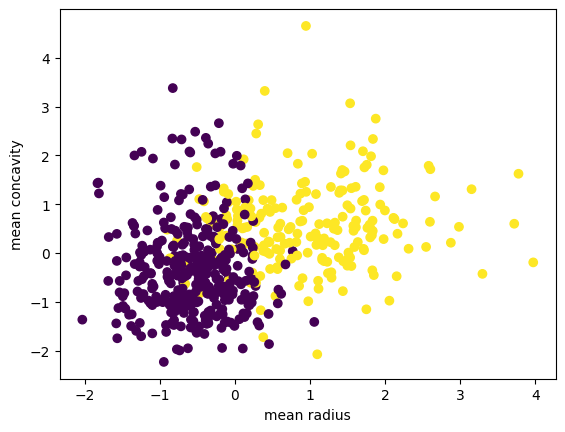

In [4]:
# plot of the dataset
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.show()

In [5]:
# Split the dataset and train it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=12)
model = Perceptron()
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

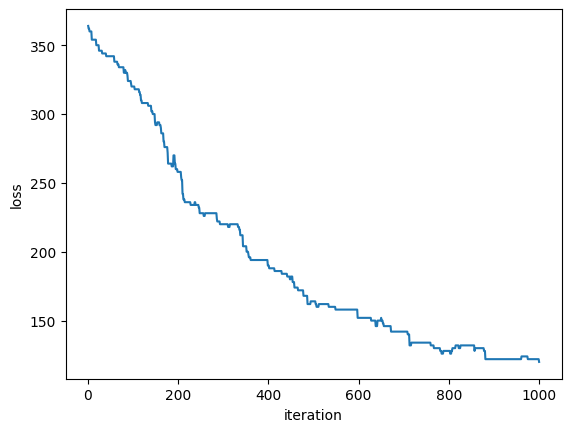

In [6]:
# Plot of the loss function
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [7]:
# Calculate the training and testing accuracy
y_pred = model.prediction(X_train, model.weights)
print(f'Perceptron, training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Perceptron, test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Perceptron, training accuracy score = 0.8591549295774648
Perceptron, test accuracy score = 0.8461538461538461


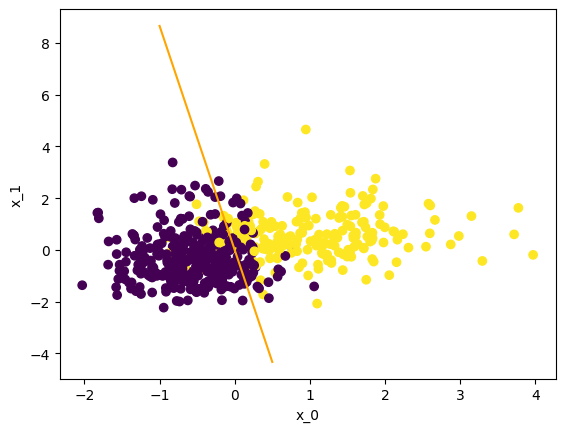

In [8]:
# Plot the results
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)

domain = np.arange(-1., 1.0, 0.5)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separetor', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

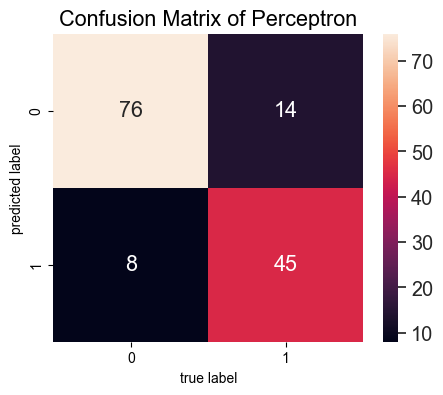

In [9]:
# Construction of confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix of Perceptron')
ax.set_xlabel('true label', fontsize=10)
ax.set_ylabel('predicted label', fontsize=10)
plt.show()

1. Feature Selection

- Explanation:
    Perceptron models heavily rely on the features provided to them. If the features chosen are not the most relevant or informative for distinguishing between cancerous and non-cancerous samples, the model's performance could suffer.
- Solution:
    Carefully select features that capture meaningful patterns in the data.

2. Imbalanced Data
- Explanation:
    If the dataset contains a significantly larger number of samples from one class (e.g., non-cancerous) compared to the other class (e.g., cancerous), the model might become biased towards the majority class, leading to suboptimal performance.
- Solution:
    - Use techniques such as resampling (e.g., oversampling the minority class, undersampling the majority class) to balance the dataset.
    - Use class weights during model training to give more importance to minority class samples.

3. Model Complexity
- Explanation:
    Perceptron models might struggle with datasets that have complex relationships or nonlinear decision boundaries, as they are relatively simple models.
- Solution:
    Consider using more complex models like support vector machines (SVMs) or neural networks, which can learn more intricate patterns in the data.

4. Hyperparameter Tuning
- Explanation:
    The performance of the perceptron model could be sensitive to its hyperparameters, such as the learning rate and the number of iterations.
- Solution:
    Experiment with different values for these hyperparameters through techniques like grid search or random search.

By carefully examining these factors and making appropriate adjustments, you can potentially improve the accuracy of your perceptron model for breast cancer classification. It's also essential to continuously iterate and refine your approach based on the insights gained from analyzing the model's performance.





